<a href="https://colab.research.google.com/github/Erlangga24/MachineLearning/blob/main/UTS1_G_231_21_0018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Menganalisa dataset CADdataset menggunakan metode Decision Tree**

In [3]:
#import Pustaka yang diperlukan
import pandas as pd
import numpy as np
#menggunakan fungsi read_csv dari pustaka Pandas untuk membaca data dari file CSV yang disebut 'CADdataset.csv'. Parameter on_bad_lines='skip' codingan menunjukkan bahwa baris yang 'error' akan dilewati
data = pd.read_csv('CADdataset.csv', on_bad_lines='skip')

In [4]:
#menampilkan beberapa baris pertama dari DataFrame
data.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


In [5]:
#mengubah variabel kategorikal dalam DataFrame data menjadi variabel dummy atau one-hot encoded
data=pd.get_dummies(data)

In [6]:
#menampilkan beberapa baris pertama dari DataFrame
data.head()

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,...,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,LVH_N,LVH_Y,PRP_N,PRP_Y,CAD_Cad,CAD_Normal
0,53,90,175,29.387755,0,1,1,110,0,1,...,1,0,1,0,1,0,1,0,1,0
1,67,70,157,28.398718,0,1,0,140,1,1,...,1,0,1,0,1,0,1,0,1,0
2,54,54,164,20.077335,0,0,1,100,1,0,...,1,0,1,0,1,0,1,0,1,0
3,66,67,158,26.838648,0,1,0,100,0,1,...,1,0,0,1,1,0,1,0,0,1
4,50,87,153,37.165193,0,1,0,110,0,0,...,1,0,1,0,1,0,1,0,0,1


In [7]:
#menghapus baris yang hilang (NaN) dari DataFrame
data=data.dropna()

In [9]:
#membuat variabel y dan mengisinya dengan kolom 'CAD_Normal' dari DataFrame
y=data['CAD_Normal']

In [10]:
#mencetak bentuk (shape) dari DataFrame
print(data.shape)
#mencetak bentuk (shape) dari variabel y
print(y.shape)

(303, 36)
(303,)


In [11]:
#menghapus kolom 'CAD_Normal'
data.drop(['CAD_Normal'], axis=1)

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,...,WPE_Y,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,LVH_N,LVH_Y,PRP_N,PRP_Y,CAD_Cad
0,53,90,175,29.387755,0,1,1,110,0,1,...,0,1,0,1,0,1,0,1,0,1
1,67,70,157,28.398718,0,1,0,140,1,1,...,0,1,0,1,0,1,0,1,0,1
2,54,54,164,20.077335,0,0,1,100,1,0,...,0,1,0,1,0,1,0,1,0,1
3,66,67,158,26.838648,0,1,0,100,0,1,...,0,1,0,0,1,1,0,1,0,0
4,50,87,153,37.165193,0,1,0,110,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,29.761905,0,0,0,100,1,0,...,0,1,0,1,0,1,0,1,0,1
299,55,64,152,27.700831,0,0,0,100,0,0,...,0,0,1,1,0,1,0,1,0,0
300,48,77,160,30.078125,0,1,0,130,0,0,...,0,1,0,0,1,1,0,1,0,0
301,57,90,159,35.599858,1,0,0,100,0,0,...,0,0,1,1,0,1,0,1,0,0


In [12]:
#membagi data menjadi set pelatihan dan set pengujian
from sklearn.model_selection import train_test_split
#Parameter shuffle=True menunjukkan bahwa data akan diacak sebelum dibagi, sehingga memastikan distribusi kelas yang seimbang di kedua set (pelatihan dan pengujian)
x_train, x_test, y_train, y_test = train_test_split(data,y,shuffle=True)

In [13]:
#fungsi untuk mengevaluasi akurasi model regresi
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [14]:
#mengimport kelas DecisionTreeRegressor dari pustaka Scikit-Learn
from sklearn.tree import DecisionTreeRegressor
#membuat objek DecisionTreeRegressor dengan menetapkan parameter max_depth ke 4
regr=DecisionTreeRegressor(max_depth=4)
#melatih model DecisionTreeRegressor menggunakan data x_train dan label y_train
regr.fit(x_train,y_train)
#membuat prediksi menggunakan model pada data pengujian x_test
y_pred_dectree=regr.predict(x_test)

Decision Tree
MAE 0.0
RMSE 0.0


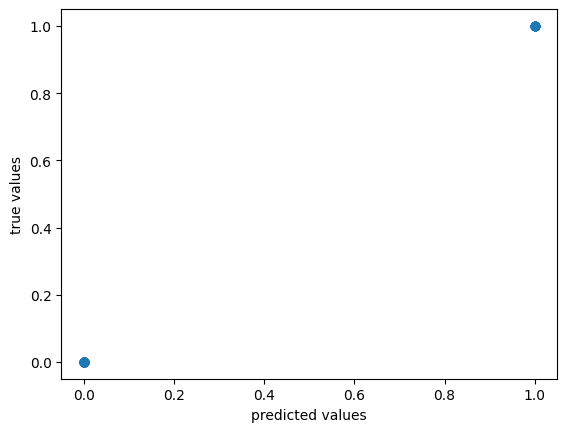

In [15]:
#mencetak judul "Decision Tree" dan kemudian memanggil fungsi accuracy untuk mengevaluasi kinerja model DecisionTreeRegressor
print("Decision Tree")
accuracy(y_pred_dectree,y_test)